In [73]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## Análisis de transporte público

### Red de transporte público

In [5]:
rutas_gdf = gpd.read_file('/home/edgar/SIG/ObsCds/'+
                          'Proyectos/Museo_CienciasAmbientales'+
                          '/Medio_Urbano/Transporte_Publico/'+
                          'RutasTP400m_RutaMiMacro_UTM.geojson',
                         driver='GeoJSON')
paradas_gdf = gpd.read_file('/home/edgar/SIG/ObsCds/'+
                          'Proyectos/Museo_CienciasAmbientales'+
                          '/Medio_Urbano/Transporte_Publico/'+
                            'Paradas400m_EstacionesMiMacro_UTM_v1.geojson',
                         driver='GeoJSON')

In [6]:
print(rutas_gdf.shape)
rutas_gdf.head(2)

(37507, 13)


,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,layer,path,geometry
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642,MacroPeriferico_Imeplan_UTM_v1,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (662096.413 2284192.153, 662096.413..."
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642,MacroPeriferico_Imeplan_UTM_v1,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (664462.242 2292315.052, 664462.242..."


In [7]:
print(paradas_gdf.shape)
paradas_gdf.head(2)

(37073, 20)


,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,layer,path,geometry
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,642,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (662096.413 2284192.153)
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,642,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (664462.242 2292315.052)


In [8]:
paradas_nx, rutas_nx = aup.create_network(paradas_gdf, rutas_gdf)

In [9]:
print(rutas_nx.shape)
rutas_nx.head(2)

(37507, 17)


,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,layer,path,geometry,u,v,key,length
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642,MacroPeriferico_Imeplan_UTM_v1,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (-103.44406 20.65003, -103.44406 20...",2350147961102,2350147961102,0,0.0
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642,MacroPeriferico_Imeplan_UTM_v1,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (-103.42059 20.72319, -103.42059 20...",2352661969143,2352661969143,0,0.0


In [10]:
paradas_nx = paradas_nx.iloc[paradas_nx.osmid.drop_duplicates().index]
print(paradas_nx.shape)
paradas_nx.head(2)

(36322, 21)


,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,Clasificac,Clasifica0,...,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,layer,path,geometry,osmid
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.44406 20.65003),2350147961102
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.42059 20.72319),2352661969143


## Red OSMnx

### Abre red local

In [11]:
import osmnx as ox

In [12]:
edges = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Vias_Transporte/edges_speed_AMG.geojson', driver='GeoJSON')
print(edges.shape)
edges.head(2)

(414773, 16)


,id,u,v,key,osmid,oneway,length,grade,grade_abs,bridge,junction,service,tunnel,walkspeed,time_min,geometry
0,-1.922695e+09,1.680913e+09,1.680913e+09,0.0,155732288,False,45.603,0.022,0.022,None,None,None,None,3.703559,0.738797,"LINESTRING (-103.25834 20.68905, -103.25844 20..."
1,-1.922105e+09,4.343498e+09,4.343498e+09,0.0,436461417,False,141.661,0.042,0.042,None,None,None,None,3.453176,2.461404,"LINESTRING (-103.19724 20.66496, -103.19742 20..."


In [13]:
nodes = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Vias_Transporte/nodes_AMG.geojson', driver='GeoJSON')
print(nodes.shape)
nodes.head(2)

(172090, 5)


,osmid,x,y,street_count,geometry
0,28751344,-103.306309,20.711533,3.0,POINT (-103.30631 20.71153)
1,28753224,-103.316645,20.700650,3.0,POINT (-103.31665 20.70065)


In [14]:
G = ox.graph_from_gdfs(nodes.set_index('osmid'), edges.set_index(['u','v','key']))

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/osmnx/utils_graph.py:155: UserWarning: discarding the gdf_nodes geometry column, though its values differ from the coordinates in the x and y columns
  warnings.warn(


### Filtro de edges y nodos conectados al museo

In [15]:
nodes_conect_list = list(edges.loc[edges.u==999999]['v'])
nodes_conect_list.append(list(edges.loc[edges.v==999999]['u'])[0])

In [16]:
nodes_conect_list

[7767887410.0, 8818211961.0]

In [17]:
nodes_conect_gdf = nodes.loc[nodes.osmid.isin(nodes_conect_list)]
print(nodes_conect_gdf.shape)
nodes_conect_gdf

(2, 5)


,osmid,x,y,street_count,geometry
126018,7767887410,-103.381158,20.734485,3.0,POINT (-103.38116 20.73448)
171750,8818211961,-103.381158,20.738620,3.0,POINT (-103.38116 20.73862)


### Filtrado de rutas - nodes

In [18]:
nodes_tmp = nodes_conect_gdf.to_crs("EPSG:32613")
buffer = nodes_tmp.buffer(50)

In [19]:
rutas_buffer = gpd.clip(rutas_nx.to_crs("EPSG:32613"), buffer)
print(rutas_buffer.shape)
rutas_buffer.head(4)

(40, 17)


,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,layer,path,geometry,u,v,key,length
10027,None,None,None,None,9935.0,183.0,Complementaria,Rutas complementarias y otros servicios,Operando,183,Rutas_TP_400m_UTM,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (668520.418 2293571.974, 668600.993...",2356580970186,2356880970421,0,398.021043
1612,None,None,None,None,1520.0,32.0,Complementaria,Rutas complementarias y otros servicios,Operando,32,Rutas_TP_400m_UTM,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (668520.418 2293571.974, 668600.993...",2356571970209,2356898970433,0,396.071285
1384,None,None,None,None,1292.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29,Rutas_TP_400m_UTM,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (668600.993 2293629.697, 668520.418...",2356987970573,2356713970306,0,398.279702
1541,None,None,None,None,1449.0,31.0,Complementaria,Rutas complementarias y otros servicios,Operando,31,Rutas_TP_400m_UTM,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,"LINESTRING (668520.418 2293571.974, 668600.993...",2356715970308,2356987970573,0,395.520790


In [20]:
id_rutas_buffer = list(rutas_buffer.Ruta_id.unique())
paradas_rutas_buffer = paradas_nx.loc[paradas_nx.Ruta_id.isin(id_rutas_buffer)]
paradas_rutas_buffer = paradas_rutas_buffer.rename(columns={'osmid':'coord_id'})
print(paradas_rutas_buffer.shape)
paradas_rutas_buffer.head(2)

(1228, 21)


,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,Clasificac,Clasifica0,...,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,layer,path,geometry,coord_id
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.44406 20.65003),2350147961102
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.42059 20.72319),2352661969143


In [69]:
museo = nodes.loc[nodes.osmid==999999].copy()

### Filtrado de rutas - museo [deprecated]

In [19]:
museo = museo.to_crs("EPSG:32613")
buffer = museo.buffer(100)

In [20]:
rutas_buffer = gpd.clip(rutas_nx.to_crs("EPSG:32613"), buffer)
rutas_buffer.head(4)

,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,geometry,u,v,key,length
9934,9935,183,Complementaria,Rutas complementarias y otros servicios,Operando,183,"LINESTRING (668608.465 2293635.051, 668655.163...",2356580970186,2356880970421,0,398.021043
1519,1520,32,Complementaria,Rutas complementarias y otros servicios,Operando,32,"LINESTRING (668608.465 2293635.051, 668655.163...",2356571970209,2356898970433,0,396.071285
1291,1292,29,Complementaria,Rutas complementarias y otros servicios,Operando,29,"LINESTRING (668655.163 2293668.505, 668608.465...",2356987970573,2356713970306,0,398.279702
1448,1449,31,Complementaria,Rutas complementarias y otros servicios,Operando,31,"LINESTRING (668608.465 2293635.051, 668655.163...",2356715970308,2356987970573,0,395.520790


In [21]:
id_rutas_buffer = list(rutas_buffer.Ruta_id.unique())
paradas_rutas_buffer = paradas_nx.loc[paradas_nx.Ruta_id.isin(id_rutas_buffer)]
paradas_rutas_buffer = paradas_rutas_buffer.rename(columns={'osmid':'coord_id'})
print(paradas_rutas_buffer.shape)
paradas_rutas_buffer.head(2)

(677, 14)


,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,coord_id
1252,1267,29,Complementaria,Rutas complementarias y otros servicios,Operando,29,0,0,0,0,0.00000,202.126417,POINT (-103.35767 20.76556),2359231973751
1253,1267,29,Complementaria,Rutas complementarias y otros servicios,Operando,29,-1,7,0,7,399.96641,258.039828,POINT (-103.36007 20.76331),2358980973505


## Unir edges conectados a museo y transporte público

In [21]:
rutas_nx_edges = rutas_nx.loc[rutas_nx.Ruta_id.isin(id_rutas_buffer)]
rutas_nx_edges = rutas_nx_edges.append(edges.loc[edges.u==999999])
rutas_nx_edges = rutas_nx_edges.append(edges.loc[edges.v==999999])
print(rutas_nx_edges.shape)
rutas_nx_edges.head(2)

(1294, 28)


,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,...,osmid,oneway,grade,grade_abs,bridge,junction,service,tunnel,walkspeed,time_min
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Paradas cercanas a nodos

In [22]:
paradas_osmid = aup.find_nearest(G, nodes_conect_gdf.set_index('osmid'), 
                                 paradas_rutas_buffer, return_distance=True)
paradas_osmid.head(2)

,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,Clasificac,Clasifica0,...,vertex_par,vertex_p_1,distance,angle,layer,path,geometry,coord_id,osmid,distance_node
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.44406 20.65003),2350147961102,7767887410,11445.831335
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.42059 20.72319),2352661969143,7767887410,4289.203522


### Nuevas conexiones de nodos al transporte público

In [23]:
from shapely.geometry import LineString
from shapely import wkt

In [25]:
for r in id_rutas_buffer:
    
    paradas_osmid = paradas_osmid.reset_index(drop=True)
    
    mindist = paradas_osmid.loc[paradas_osmid.Ruta_id==r].distance_node.min()
    minidx = paradas_osmid.loc[paradas_osmid.Ruta_id==r].distance_node.idxmin()
    
    osmid_idx = paradas_osmid.iloc[minidx].osmid
    coord_idx = paradas_osmid.iloc[minidx].coord_id
    
    geom_u = nodes.loc[nodes.osmid==osmid_idx].geometry.values[0]
    geom_v = paradas_osmid.iloc[minidx].geometry
    
    geom_line = LineString([geom_u, geom_v]).wkt
    
    geo_dict = {'u':[osmid_idx],'v':[coord_idx],'key':[0],
            'walkspeed':[4], 'geometry':geom_line}
    
    line_df = pd.DataFrame.from_dict(geo_dict)
    
    line_df['geometry'] = line_df['geometry'].apply(wkt.loads)
    
    line_gdf = gpd.GeoDataFrame(line_df, geometry='geometry', crs="EPSG:4326")
    
    rutas_nx_edges = rutas_nx_edges.append(line_gdf)


## Cálculo de distancia y velocidades

In [27]:
vel_tp = 25
vel_macrop = 40

In [28]:
rutas_nx_edges = rutas_nx_edges.to_crs("EPSG:32613")

In [29]:
rutas_nx_edges['length'] = rutas_nx_edges.length

In [30]:
idx = rutas_nx_edges.walkspeed.isna()
rutas_nx_edges.loc[idx, 'walkspeed'] = vel_tp

### Ruta Mi Macro Periférico

In [31]:
rutas_nx_edges.loc[rutas_nx_edges.Ruta_id==642, 'walkspeed'] = vel_macrop

<AxesSubplot:>

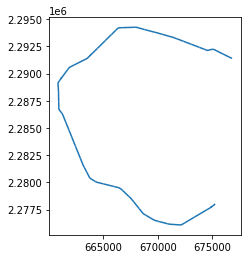

In [32]:
rutas_nx_edges.loc[rutas_nx_edges.Ruta_id==642].plot()

### Velocidades

In [33]:
rutas_nx_edges['time_min'] = rutas_nx_edges['length']/(1000*rutas_nx_edges['walkspeed']/60)

<AxesSubplot:>

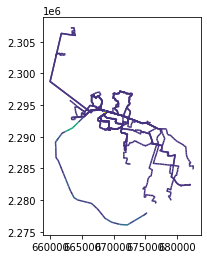

In [34]:
rutas_nx_edges.plot('time_min')

In [35]:
rutas_nx_edges = rutas_nx_edges.to_crs("EPSG:4326")

In [36]:
print(rutas_nx_edges.shape)
rutas_nx_edges.head(2)

(1314, 28)


,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,...,osmid,oneway,grade,grade_abs,bridge,junction,service,tunnel,walkspeed,time_min
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0.0
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0.0


## Filtrado de rutas y nodos

In [37]:
rutas_nx_filtro = rutas_nx_edges.loc[rutas_nx_edges.Ruta_id.isin(id_rutas_buffer)]
print(rutas_nx_filtro.shape)
rutas_nx_filtro.head(2)

(1292, 28)


,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,...,osmid,oneway,grade,grade_abs,bridge,junction,service,tunnel,walkspeed,time_min
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0.0
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0.0


<AxesSubplot:>

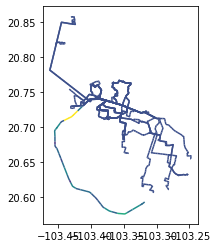

In [38]:
rutas_nx_filtro.plot('time_min')

In [39]:
paradas_nx_filtro = paradas_rutas_buffer.copy()

In [40]:
paradas_nx_filtro.rename(columns={'coord_id':'osmid'}, inplace=True)

In [41]:
paradas_nodos = paradas_nx_filtro.append(nodes_conect_gdf)
paradas_nodos = paradas_nx_filtro.append(nodes.loc[nodes.osmid==999999])

In [42]:
paradas_nodos.head(2)

,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,Clasificac,Clasifica0,...,vertex_p_1,distance,angle,layer,path,geometry,osmid,x,y,street_count
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.44406 20.65003),2350147961102,NaN,NaN,NaN
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.42059 20.72319),2352661969143,NaN,NaN,NaN


<AxesSubplot:>

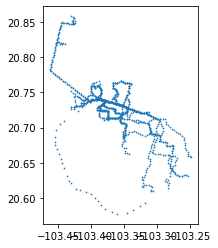

In [43]:
paradas_nodos.plot(markersize=0.5)

## Análisis de tiempo

In [80]:
from shapely.geometry import Point

In [81]:
museo = nodes.loc[nodes.osmid==999999].copy()

In [82]:
nodes_tmp = paradas_nodos.reset_index().copy()

edges_tmp = rutas_nx_edges.reset_index().copy()

from_osmid = list(set(edges_tmp['u'].to_list()).difference(set(nodes_tmp.osmid.to_list())))

nodes_dict = nodes_tmp.to_dict()

for i in from_osmid:
    row = edges_tmp.loc[(edges_tmp.u==i)].iloc[0]
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]

    nodes_dict['osmid'][len(nodes_dict['osmid'])] = i
    nodes_dict['x'][len(nodes_dict['x'])] = first_coord[0]
    nodes_dict['y'][len(nodes_dict['y'])] = first_coord[1]
    nodes_dict['street_count'][len(nodes_dict['street_count'])] = np.nan
    nodes_dict['geometry'][len(nodes_dict['geometry'])] = Point(first_coord)


to_osmid = list(set(edges_tmp['v'].to_list()).difference(set(list(nodes_dict['osmid'].values()))))

for i in to_osmid:
    row = edges_tmp.loc[(edges_tmp.v==i)].iloc[0]
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]

    nodes_dict['osmid'][len(nodes_dict['osmid'])] = i
    nodes_dict['x'][len(nodes_dict['x'])] = last_coord[0]
    nodes_dict['y'][len(nodes_dict['y'])] = last_coord[1]
    nodes_dict['street_count'][len(nodes_dict['street_count'])] = np.nan
    nodes_dict['geometry'][len(nodes_dict['geometry'])] = Point(last_coord)

nodes_tmp = pd.DataFrame.from_dict(nodes_dict)
nodes_tmp = gpd.GeoDataFrame(nodes_tmp, crs="EPSG:4326", geometry='geometry')
paradas_nodos = nodes_tmp.copy()

In [83]:
print(paradas_nodos.shape)
paradas_nodos.head(2)

(1368, 18)


,index,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,osmid,x,y,street_count
0,1252.0,1267.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,0.0,0.0,0.0,0.0,0.00000,202.126417,POINT (-103.35767 20.76556),2.359232e+12,NaN,NaN,NaN
1,1253.0,1267.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,-1.0,7.0,0.0,7.0,399.96641,258.039828,POINT (-103.36007 20.76331),2.358981e+12,NaN,NaN,NaN


In [84]:
paradas_nodos.loc[paradas_nodos.osmid==999999]

,index,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,osmid,x,y,street_count
1345,172089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-103.38096 20.73560),999999.0,-103.380963,20.735599,NaN


In [85]:
paradas_dist = aup.calculate_distance_nearest_poi(museo, paradas_nodos, 
                rutas_nx_edges, 'museo', 'osmid', wght='time_min')

In [86]:
print(paradas_dist.shape)
paradas_dist.head(5)

(1368, 19)


,level_0,index,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,x,y,street_count,dist_museo
osmid,,,,,,,,,,,,,,,,,,,
2.359232e+12,0,1252.0,1267.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,0.0,0.0,0.0,0.0,0.00000,202.126417,POINT (-103.35767 20.76556),NaN,NaN,NaN,26.346445
2.358981e+12,1,1253.0,1267.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,-1.0,7.0,0.0,7.0,399.96641,258.039828,POINT (-103.36007 20.76331),NaN,NaN,NaN,27.306364
2.358590e+12,2,1254.0,1268.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,-1.0,16.0,0.0,16.0,399.96641,266.450939,POINT (-103.36384 20.76321),NaN,NaN,NaN,27.254082
2.358238e+12,3,1255.0,1269.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,-1.0,11.0,0.0,11.0,399.96641,239.111167,POINT (-103.36723 20.76313),NaN,NaN,NaN,26.294163
2.358257e+12,4,1256.0,1270.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,-1.0,8.0,0.0,8.0,399.96641,189.000972,POINT (-103.36702 20.76011),NaN,NaN,NaN,25.334244


<AxesSubplot:>

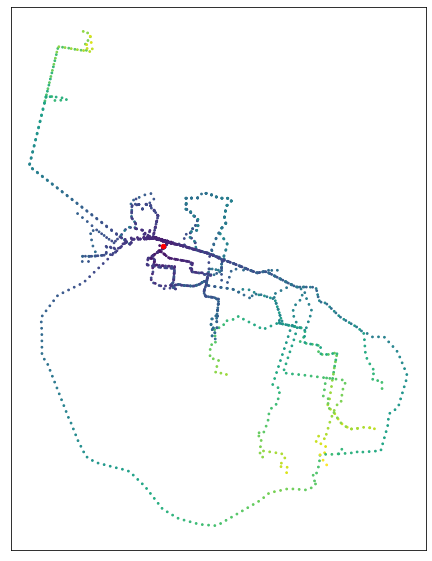

In [87]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
#nodes_c.plot(ax=ax, color='black', markersize=15, zorder=1)
#edges_c.plot(ax=ax, color='#999999', zorder=-1)

museo.plot(color='red', markersize=20, ax=ax, zorder=2)
paradas_dist.plot('dist_museo', markersize=3, ax=ax)
#edges.plot(ax=ax, color='#e8e9eb',linewidth=0.1, zorder=-1)
#edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=ax, color='#e8e9eb',linewidth=0.5, zorder=0)

## Conexión de red de transporte

### Nodos a paradas

In [44]:
print(paradas_rutas_buffer.shape)
paradas_rutas_buffer.head(2)

(1228, 21)


,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,Clasificac,Clasifica0,...,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,layer,path,geometry,coord_id
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.44406 20.65003),2350147961102
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.42059 20.72319),2352661969143


In [45]:
paradas_rutas_buffer['x'] = paradas_rutas_buffer.geometry.x
paradas_rutas_buffer['y'] = paradas_rutas_buffer.geometry.y

In [51]:
nodes_tmp_name = nodes.rename(columns={'osmid':'osmnx_id'}).copy()
idx = nodes_tmp_name.osmnx_id==999_999
nodes_tmp_name = nodes_tmp_name.loc[~idx] #quita al nodo del museo para que no se conecte a paradas

nodes_to_paradas = gpd.GeoDataFrame()

for r in list(paradas_rutas_buffer.Ruta_id.unique()):

    paradas_rutas_tmp = paradas_rutas_buffer.loc[paradas_rutas_buffer.Ruta_id==r].rename(
        columns={'coord_id':'osmid'}).copy()

    nodes_paradas_tmp = aup.find_nearest(G, paradas_rutas_tmp.set_index('osmid'), 
                                     nodes_tmp_name, return_distance=True)
    nodes_paradas_tmp['Ruta_id'] = r
    
    nodes_to_paradas = nodes_to_paradas.append(nodes_paradas_tmp.loc[nodes_paradas_tmp.distance_node<=150])

In [52]:
nodes_to_paradas.rename(columns={'osmid':'coord_id','osmnx_id':'osmid'}, inplace=True)
print(nodes_to_paradas.shape)
nodes_to_paradas.head(5)

(27470, 8)


,osmid,x,y,street_count,geometry,coord_id,distance_node,Ruta_id
39,28791819,-103.454674,20.696136,3.0,POINT (-103.45467 20.69614),2349157966280,103.912247,642
64,273152670,-103.453587,20.697413,3.0,POINT (-103.45359 20.69741),2349157966280,78.122674,642
65,273152800,-103.454945,20.696037,4.0,POINT (-103.45494 20.69604),2349157966280,130.115372,642
66,273153678,-103.453845,20.696622,3.0,POINT (-103.45384 20.69662),2349157966280,40.973267,642
67,273153681,-103.453736,20.697244,3.0,POINT (-103.45374 20.69724),2349157966280,53.820236,642


In [53]:
nodes_to_paradas.distance_node.mean()

94.82798758761686

### Paradas a nodos [depreceated]

In [ ]:
paradas_rutas_buffer.head(2)

In [ ]:
paradas_buffer_osmid = aup.find_nearest(G, nodes.set_index('osmid'), 
                                 paradas_rutas_buffer, return_distance=True)

In [ ]:
print(paradas_buffer_osmid.shape)
paradas_buffer_osmid.head(2)

In [ ]:
paradas_buffer_osmid.distance_node.mean()

### Conexiones a nodos

#### Tiempo de espera en parada

In [54]:
t = [5,7,10]

In [55]:

paradas_buffer_iter = nodes_to_paradas.copy()

rutas_nx_edges_all = rutas_nx_edges.copy()

paradas_buffer_iter.reset_index(drop=True, inplace=True)

for index,row in paradas_buffer_iter.iterrows():
        
    row_index = index
    osmid_idx = row['osmid']
    coord_idx = row['coord_id']
    
    if osmid_idx not in nodes_conect_list:
    
        geom_u = nodes.loc[nodes.osmid==osmid_idx].geometry.values[0]
        geom_v = paradas_rutas_buffer.loc[paradas_rutas_buffer.coord_id==coord_idx].geometry.values[0]
        
        long_m = aup.haversine((geom_u.x,geom_u.y), (geom_v.x,geom_v.y))
        
        if long_m <= 50:
            vel = ( long_m / 1000 ) * ( 60 / t[0] )
        elif long_m > 50 and long_m <= 100:
            vel = ( long_m / 1000 ) * ( 60 / t[1] )
        elif long_m > 100:
            vel = ( long_m / 1000 ) * ( 60 / t[2] )
        
        #vel = ( long_m / 1000 ) * ( 60 / t )
        
        geom_line = LineString([geom_u, geom_v]).wkt

        geo_dict = {'u':[osmid_idx],'v':[coord_idx],'key':[0],
                'walkspeed':[vel], 'geometry':geom_line}

        line_df = pd.DataFrame.from_dict(geo_dict)

        line_df['geometry'] = line_df['geometry'].apply(wkt.loads)

        line_gdf = gpd.GeoDataFrame(line_df, geometry='geometry', crs="EPSG:4326")

        rutas_nx_edges_all = rutas_nx_edges_all.append(line_gdf)


In [56]:
rutas_nx_edges_all = rutas_nx_edges_all.append(edges)

In [57]:
print(rutas_nx_edges_all.shape)
rutas_nx_edges_all.head(2)

(443528, 28)


,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,...,osmid,oneway,grade,grade_abs,bridge,junction,service,tunnel,walkspeed,time_min
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0.0
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,NaN,NaN,None,None,None,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0.0


### Recalcula distancia y velocidad

In [58]:
rutas_nx_edges_all = rutas_nx_edges_all.to_crs("EPSG:6372")
rutas_nx_edges_all['length'] = rutas_nx_edges_all.length
rutas_nx_edges_all['time_min'] = rutas_nx_edges_all['length']/(1000*rutas_nx_edges_all['walkspeed']/60)
rutas_nx_edges_all = rutas_nx_edges_all.to_crs("EPSG:4326")

In [59]:
rutas_nx_edges_all.drop_duplicates(inplace=True)
print(rutas_nx_edges_all.shape)

(443525, 28)


## Calcula tiempos en red de ciudad

In [60]:
paradas_nodes = paradas_nodos.append(nodes)
print(paradas_nodes.shape)
paradas_nodes.head(2)

(173319, 24)


,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,Clasificac,Clasifica0,...,vertex_p_1,distance,angle,layer,path,geometry,osmid,x,y,street_count
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.44406 20.65003),2350147961102,NaN,NaN,NaN
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,None,None,...,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.42059 20.72319),2352661969143,NaN,NaN,NaN


In [61]:
idx = paradas_nodes.coord_id.isna()

paradas_nodes.loc[~idx,'osmid'] = paradas_nodes.loc[~idx,'coord_id']

AttributeError: 'GeoDataFrame' object has no attribute 'coord_id'

In [62]:
paradas_nodes = paradas_nodes.drop_duplicates(subset='osmid')

In [64]:
from shapely.geometry import Point

nodes_tmp = paradas_nodes.reset_index().copy()

idx = nodes_tmp.osmid.isna()

nodes_tmp = nodes_tmp[~idx]

edges_tmp = rutas_nx_edges_all.reset_index().copy()

idx = edges_tmp['u'].isna()

edges_tmp = edges_tmp[~idx]

from_osmid = list(set(edges_tmp['u'].to_list()).difference(set(nodes_tmp.osmid.to_list())))

nodes_dict = nodes_tmp.to_dict()

for i in from_osmid:
    row = edges_tmp.loc[(edges_tmp.u==i)].iloc[0]
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]

    nodes_dict['osmid'][len(nodes_dict['osmid'])] = i
    nodes_dict['x'][len(nodes_dict['x'])] = first_coord[0]
    nodes_dict['y'][len(nodes_dict['y'])] = first_coord[1]
    nodes_dict['street_count'][len(nodes_dict['street_count'])] = np.nan
    nodes_dict['geometry'][len(nodes_dict['geometry'])] = Point(first_coord)


to_osmid = list(set(edges_tmp['v'].to_list()).difference(set(list(nodes_dict['osmid'].values()))))

for i in to_osmid:
    row = edges_tmp.loc[(edges_tmp.v==i)].iloc[0]
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]

    nodes_dict['osmid'][len(nodes_dict['osmid'])] = i
    nodes_dict['x'][len(nodes_dict['x'])] = last_coord[0]
    nodes_dict['y'][len(nodes_dict['y'])] = last_coord[1]
    nodes_dict['street_count'][len(nodes_dict['street_count'])] = np.nan
    nodes_dict['geometry'][len(nodes_dict['geometry'])] = Point(last_coord)

nodes_tmp = pd.DataFrame.from_dict(nodes_dict)
nodes_tmp = gpd.GeoDataFrame(nodes_tmp, crs="EPSG:4326", geometry='geometry')
paradas_nodes_fill = nodes_tmp.copy()

In [65]:
rutas_nx_edges_all.loc[rutas_nx_edges_all.u == 2357450967978]

,Tipo_de_co,Tipo,Nombre,Estado,fid,cat,Tipo_de_se,Clasificac,Clasifica0,Ruta_id,...,osmid,oneway,grade,grade_abs,bridge,junction,service,tunnel,walkspeed,time_min
1398,None,None,None,None,1306.0,29.0,Complementaria,Rutas complementarias y otros servicios,Operando,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.955885


In [66]:
idx = rutas_nx_edges_all['u'].isna()

rutas_nx_edges_all = rutas_nx_edges_all[~idx]

In [67]:
paradas_nodes_fill.drop(columns=['level_0','index'],inplace=True)

KeyError: "['level_0'] not found in axis"

In [70]:
paradas_dist = aup.calculate_distance_nearest_poi(museo, paradas_nodes_fill, 
                rutas_nx_edges_all, 'museo', 'osmid', wght='time_min')

In [71]:
print(paradas_dist.shape)
paradas_dist.head(2)

(173183, 26)


,level_0,index,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,...,vertex_p_1,distance,angle,layer,path,geometry,x,y,street_count,dist_museo
osmid,,,,,,,,,,,,,,,,,,,,,
2.350148e+12,0,0.0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,...,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.44406 20.65003),NaN,NaN,NaN,30.54624
2.352662e+12,1,1.0,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,NaN,NaN,None,...,NaN,NaN,NaN,Estaciones_MiMacro,/home/edgar/SIG/ObsCds/Proyectos/Museo_Ciencia...,POINT (-103.42059 20.72319),NaN,NaN,NaN,15.34984


<AxesSubplot:>

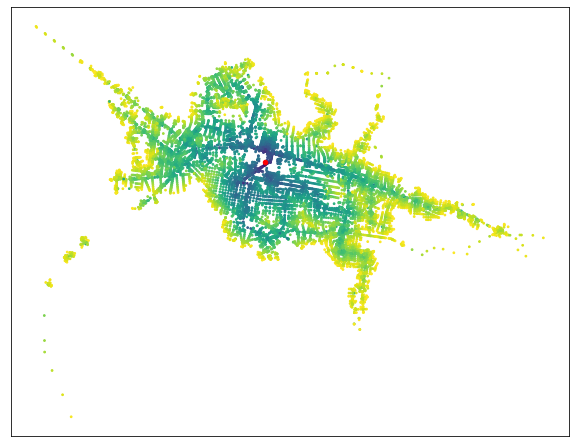

In [74]:
fig,ax = plt.subplots(figsize=(10,10))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

museo.plot(color='red', markersize=20, ax=ax, zorder=2)
paradas_dist.loc[paradas_dist.dist_museo<=30].plot('dist_museo', markersize=3, ax=ax)

## Save

In [89]:
v = 1
paradas_dist.to_file('/home/edgar/SIG/ObsCds/Proyectos/'+
                     'Museo_CienciasAmbientales/Medio_Urbano/Analisis/'+
                     f'nodesTime_PuertaSur_TransportePublico_AMG_v{v}.geojson',
                    driver='GeoJSON')

## Remueve paradas

In [76]:
idx = paradas_dist.Ruta_id.isna()
nodos_tiempo_museo = paradas_dist[idx].copy()
nodos_tiempo_museo.rename(columns={'dist_museo':'tiempo_museo'}, inplace=True)
print(nodos_tiempo_museo.shape)
nodos_tiempo_museo.head(2)

(171955, 26)


,level_0,index,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,fid,cat,Tipo_de_se,...,vertex_p_1,distance,angle,layer,path,geometry,x,y,street_count,tiempo_museo
osmid,,,,,,,,,,,,,,,,,,,,,
999999.0,1228,172089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (-103.38122 20.73521),-103.380963,20.735599,NaN,0.000000
28751344.0,1229,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (-103.30631 20.71153),-103.306309,20.711533,3.0,32.170652


## Agrupar por hexágonos

### Descarga de límite municipal

In [77]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
mpos_folder = 'mpos_2020'
hex_folder = 'hexgrid_9'
mun_gdf = gpd.GeoDataFrame()
hex_gdf = gpd.GeoDataFrame()

In [78]:
#Download agebs, hexgrid and municipality figures
for c in df.columns.unique():
    if c == 'Guadalajara':
        mun_gdf = gpd.GeoDataFrame()
        hex_gdf = gpd.GeoDataFrame()
        for i in range(len(df.loc["mpos", c])):
            # Extracts specific municipality code
            m = df.loc["mpos", c][i]
            # Downloads municipality polygon according to code
            query = f"SELECT * FROM marco.{mpos_folder} WHERE \"CVEGEO\" LIKE \'{m}\'"
            mun_gdf = mun_gdf.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [79]:
mun_gdf = mun_gdf.to_crs("EPSG:4326")

In [80]:
mun_gdf = mun_gdf.reset_index().drop(columns='index')

In [81]:
res = 9
hex_gdf = aup.create_hexgrid(mun_gdf, res)

<AxesSubplot:>

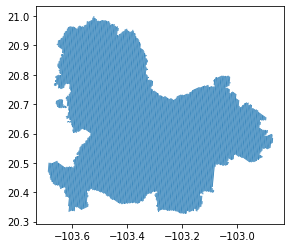

In [82]:
hex_gdf.plot()

In [83]:
hex_gdf = hex_gdf.to_crs("EPSG:4326")

In [84]:
hex_time = aup.group_by_hex_mean(nodos_tiempo_museo.reset_index(), hex_gdf, 9, 'tiempo_museo')
print(hex_time.shape)
hex_time.head(2)

(28610, 17)


,hex_id_9,geometry,level_0,index,fid,cat,Ruta_id,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,x,y,street_count,tiempo_museo
0,8949aa26c33ffff,"POLYGON ((-103.56408 20.42232, -103.56287 20.4...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8949abc9183ffff,"POLYGON ((-103.60846 20.38988, -103.60725 20.3...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

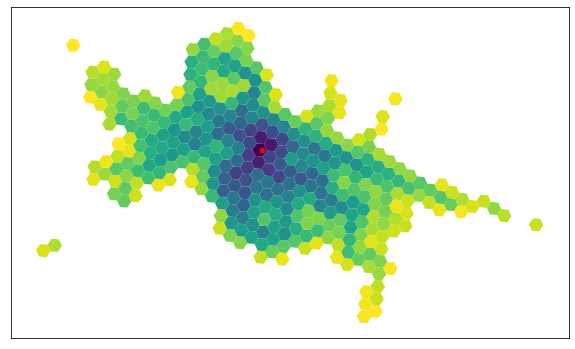

In [87]:
fig,ax = plt.subplots(figsize=(10,10))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

museo.plot(color='red', markersize=20, ax=ax, zorder=2)
#paradas_dist.loc[paradas_dist.dist_museo<=30]
hex_time.loc[(hex_time.tiempo_museo>0)&(hex_time.tiempo_museo<=30)].plot('tiempo_museo', ax=ax)

In [88]:
hex_time.loc[hex_time.tiempo_museo>0].to_file('/home/edgar/SIG/ObsCds/'+
                                              'Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Analisis/'+
                                              f'hexTime_PuertaSur_TransportePublico_AMG_v{v}.geojson',
                    driver='GeoJSON')

### Save routes

In [135]:
rutas_nx_filtro.to_file(f'/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Analisis/TransportePublico_Museo_v{v}.geojson',
                    driver='GeoJSON')

### Save edges connections

In [136]:
rutas_nx_edges_all.to_file(f'/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Analisis/edges_analysis_v{v}.geojson',
                    driver='GeoJSON')